In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

df = pd.read_csv('house_data_train.csv', index_col = 0)
df = df.dropna()
df.columns
df.head(16200)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9469,2422049107,20140508T000000,350000.0,4.0,1.75,2250,13515,1.0,0,0,...,8,2150,100,1940,0,98030,47.3789,-122.229,2150,12508
15048,6151800225,20150409T000000,475000.0,3.0,1.75,1850,26445,1.0,0,0,...,7,1850,0,1962,1977,98010,47.3412,-122.051,2110,23280
3728,2919701105,20141209T000000,422000.0,2.0,1.75,1320,2609,1.0,0,0,...,7,920,400,1938,0,98117,47.6878,-122.366,1200,4220
2552,4137060270,20150105T000000,313000.0,4.0,2.50,2460,10320,2.0,0,0,...,8,2460,0,1993,0,98092,47.2599,-122.215,2210,9024
3275,818500490,20141009T000000,153503.0,2.0,2.50,1240,3649,2.0,0,0,...,7,1240,0,1986,0,98003,47.3241,-122.322,1400,3721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2824079053,20150113T000000,440000.0,3.0,2.50,1910,66211,2.0,0,0,...,7,1910,0,1997,0,98024,47.5385,-121.911,2330,67268
12076,2193310320,20150306T000000,595000.0,4.0,2.50,2330,7064,1.0,0,0,...,8,1780,550,1984,0,98052,47.6955,-122.097,1740,8075
8709,7504010750,20140924T000000,649990.0,4.0,2.25,2130,11900,2.0,0,0,...,9,2130,0,1976,0,98074,47.6408,-122.058,2590,11900
18794,126059310,20141130T000000,1000000.0,3.0,2.25,3040,52302,1.0,0,0,...,9,3040,0,2005,0,98072,47.7635,-122.112,2070,38600


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'floors', 'sqft_living', 'floors', 'waterfront', 
            'view', 'grade', 'sqft_above', 'sqft_basement']

X = df[features]
Y = df['price']

W = Y.std()

Y = np.array((Y-Y.mean())/Y.std())

M = X.mean()
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

M

bedrooms             3.367469
bathrooms            2.112701
sqft_living       2081.468580
sqft_lot         14987.381420
floors               1.492346
sqft_living       2081.468580
floors               1.492346
waterfront           0.007963
view                 0.237222
grade                7.656111
sqft_above        1789.841728
sqft_basement      291.626852
dtype: float64

###Split Data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)

lr = LinearRegression()

cv_scores = cross_val_score(lr, X_train, Y_train, cv = kfold)

###Linear Regression

In [47]:
def initialize(dim):
    b=random.random()
    a=np.random.rand(dim)
    return b,a

def predict_Y(b,a,X):
    return b + np.dot(X,a)

def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db = (np.sum(y_hat-y)*2)/len(y)
    dw = (np.dot((y_hat-y),x)*2)/len(y)
    b_1 = b_0-learning_rate * db
    theta_1 = theta_o-learning_rate*dw
    return b_1,theta_1

def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-8
    b,theta = initialize(X.shape[1])
    num_weight = len(features)
    weights = [f'weights_a{i}' for i in range(num_weight)]
    gd_iterations_df = pd.DataFrame(columns = ['iteration','value_b', *weights, 'cost'])
    result_idx = 0
    prev_cost = 0
    for iter_num in range(num_iterations):
        Y_hat = predict_Y(b,theta,X)
        this_cost = get_cost(Y,Y_hat)
        prev_b = b
        prev_theta = theta
        b,theta = update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx] = [iter_num,b, *theta[:num_weight] , this_cost]
        result_idx = result_idx+1   
        if (np.abs(this_cost - prev_cost) < tolerance):
          print(np.abs(this_cost - prev_cost))
          break
        prev_cost = this_cost
    return gd_iterations_df,b,theta
        
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha = 0.01,num_iterations = 1000)
gd_iterations_df

9.88908654964149e-09


,iteration,value_b,weights_a0,weights_a1,weights_a2,weights_a3,weights_a4,weights_a5,weights_a6,weights_a7,weights_a8,weights_a9,weights_a10,weights_a11,cost
0,0.0,8.810481e-01,0.594143,0.214351,0.277170,0.024939,0.690051,0.741605,0.890866,0.169652,0.886138,0.252058,0.070619,0.477076,10.005637
1,1.0,8.634271e-01,0.561388,0.172460,0.234720,0.019196,0.650676,0.699154,0.851492,0.160062,0.862128,0.215634,0.031536,0.462202,8.401966
2,2.0,8.461586e-01,0.531808,0.135044,0.197091,0.014285,0.614702,0.661526,0.815517,0.151258,0.839825,0.183542,-0.002908,0.448644,7.109317
3,3.0,8.292354e-01,0.505064,0.101628,0.163767,0.010107,0.581784,0.628201,0.782600,0.143167,0.819062,0.155317,-0.033211,0.436260,6.065585
4,4.0,8.126507e-01,0.480854,0.071787,0.134281,0.006578,0.551616,0.598715,0.752431,0.135722,0.799688,0.130542,-0.059821,0.424922,5.221139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,881.0,1.641241e-08,-0.092791,-0.035135,0.012442,-0.047791,-0.111601,0.476877,0.089215,0.138830,0.124728,0.308178,0.004710,0.050937,0.404495
882,882.0,1.608416e-08,-0.092791,-0.035127,0.012440,-0.047791,-0.111602,0.476874,0.089213,0.138830,0.124728,0.308180,0.004708,0.050935,0.404495
883,883.0,1.576248e-08,-0.092791,-0.035119,0.012437,-0.047791,-0.111604,0.476872,0.089211,0.138830,0.124728,0.308183,0.004707,0.050933,0.404495
884,884.0,1.544723e-08,-0.092792,-0.035111,0.012434,-0.047790,-0.111606,0.476869,0.089209,0.138831,0.124728,0.308186,0.004705,0.050931,0.404495


###Pipeline

In [48]:
for i in range(1,4):

  steps = [("imp_mean", SimpleImputer()), 
           ("scaler", StandardScaler()),
           ("transform", PolynomialFeatures(degree = i)),
           ("liReg", LinearRegression())]

  pipeline = Pipeline(steps)
  pipeline.fit(X_train, Y_train)

  rscore_test = pipeline.score(X_test, Y_test)
  rscore_train = pipeline.score(X_train, Y_train)

  Y_pred = pipeline.predict(X_test)

  print(i, "test: ", rscore_test, "train: ", rscore_train)

1 test:  0.5957198024266375 train:  0.5942977317317192
2 test:  0.6617413060726104 train:  0.6774945138296509
3 test:  -0.43720038016019735 train:  0.7129296381243041


###cv_scores

In [49]:
print(cv_scores)

[0.61811525 0.59336534 0.56422316 0.54112621 0.56151695 0.60915203
 0.60434977 0.61398196 0.6016554  0.57755786]


###r2score_Linear Regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
X_scaled = normalize.fit_transform(X)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_scaled, Y)
print(lr.coef_, lr.intercept_, "\n")

Y_pred = lr.predict(X_scaled)
rscore = r2_score(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
mae = mean_absolute_error(Y, Y_pred)

print('r2-score:', rscore, '\nmean squared error:', mse, '\nmean absolute error:', mae)

[-8.55075149e-01 -3.20912504e-01  1.22377905e+12 -1.27921078e+00
 -6.43095303e+13  7.87967422e+12  6.43095303e+13  1.55618387e+00
  6.48095791e-01  2.62153127e+00 -6.61715053e+12 -3.75673328e+12] -1.8917846679687502 

r2-score: 0.5953707541736983 
mean squared error: 0.4046042687123618 
mean absolute error: 0.4179250175322381


In [ ]:
print("\nactual Price:",Y[4], "Predict Price:",Y_pred[4], "Differece:", Y[4]-Y_pred[4])


actual Price: [153503.] Predict Price: 364218.0508161111 Differece: [-210715.05081611]


### Visualization for Linear Regression model

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn

# df = df.head(16200)

# # x = [df[:,1]].values.reshape(-1,1)

# sns.scatterplot(data = df, x = 'sqft_living', y = 'price')
# X_model = np.linspace(df['sqft_living'].min(), df['sqft_living'].max(), 50)
# Y_model = lr.predict(sklearn.preprocessing.StandardScaler().fit_transform(X_model.reshape(-1,1)))

# plt.plot(X_model,  Y_model, color = 'k')
# plt.legend(['training data', 'predicted model'])
# plt.show()

###Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X = df['sqft_living'].values.reshape(-1, 1)
Y = df['price'].values.reshape(-1, 1)

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation
order = 15
poly = PolynomialFeatures(degree=order, include_bias = False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

# Modeling. 
lr = LinearRegression()
model = lr.fit(poly_features, Y)
print(model.coef_, model.intercept_)

#Prediction
Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, Y)
mse = mean_squared_error(Y, Y_pred)
mae = mean_absolute_error(Y, Y_pred)

print('r2-score:', rscore.round(2), '\nmean squared error:', mse.round(2), '\nmean absolute error:', mae.round(2))
print("")
print("actual Price:",Y[0], "Predict Price:",Y_pred[0], "Differece:", Y[0]-Y_pred[0])

[[ 1.95312877e+05  9.66765981e+04 -2.42738598e+04 -6.06992588e+04
   3.65979561e+04  1.72600879e+04 -1.52015408e+04  1.01970475e+03
   1.77882682e+03 -6.94249225e+02  1.21436740e+02 -1.14791442e+01
   5.66921396e-01 -1.11900635e-02 -2.12089653e-05]] [489886.28079857]
r2-score: 0.56 
mean squared error: 61357048663.92 
mean absolute error: 165903.62

actual Price: [350000.] Predict Price: [528681.88445033] Differece: [-178681.88445033]


### Ridge Regression

In [ ]:
pr = PolynomialFeatures(degree = i)

X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

ridgeReg = Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(X_train_pr, Y_train)

Ypred_train = ridgeReg.predict(X_train_pr)
Ypred_test = ridgeReg.predict(X_test_pr)

ridgeReg.score(X_train_pr, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.712232360565002

### Lasso Regression

In [ ]:
pr = PolynomialFeatures(degree = i)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

lassoReg = Lasso(alpha=100, max_iter=20000, normalize=True)
lassoReg.fit(X_train_pr, Y_train)

Ypred_train = lassoReg.predict(X_train_pr)
Ypred_test = lassoReg.predict(X_test_pr)

lassoReg.score(X_train_pr, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.0

### cv_score of Ridge and Lasso Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits= 10, shuffle=True, random_state=100)

# lr = LinearRegression()

steps = [("imp_mean", SimpleImputer()),
          ("scaler" , StandardScaler()),
          ("tranform" , PolynomialFeatures(degree = i)),
          ("rReg" , Ridge(alpha=0, normalize=True)),
          # ("lRag", Lasso(alpha=100, max_iter=20000, normalize=True))
          ]

pipeline = Pipeline(steps)

cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=kfold)

print(cv_scores)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

[0.65076001 0.73817346 0.53201946 0.55748443 0.6203095  0.64939624
 0.65056471 0.56987742 0.57242003 0.59159392]


### Visualization for Poly regression

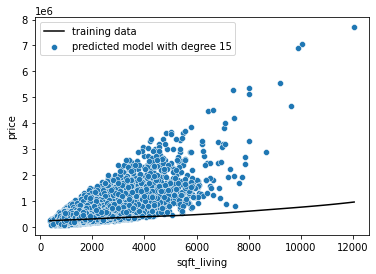

In [ ]:
sns.scatterplot(data = df, x = 'sqft_living', y = 'price')
x_model = np.linspace(df['sqft_living'].min(), df['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(order)])
plt.show()

In [ ]:
import joblib 
X = df['sqft_living'].values 
y = df['price'].values

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=6, include_bias=False) 
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

lr = LinearRegression() 
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features) 
rscore = model.score(poly_features, y) 
mse = mean_squared_error(y, Y_pred) 
mae = mean_absolute_error(y, Y_pred)